<a href="https://colab.research.google.com/github/ParthPatel-DA/ML_Project/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense

# **Importing the Dataset**

In [2]:
data = pd.read_csv('cost_of_living_us.csv')

In [3]:
data.head()

case_id state  isMetro            areaname          county  \
0        1    AL     True  Montgomery, AL MSA  Autauga County   
1        1    AL     True  Montgomery, AL MSA  Autauga County   
2        1    AL     True  Montgomery, AL MSA  Autauga County   
3        1    AL     True  Montgomery, AL MSA  Autauga County   
4        1    AL     True  Montgomery, AL MSA  Autauga County   

  family_member_count  housing_cost    food_cost  transportation_cost  \
0                1p0c    8505.72876   3454.91712          10829.16876   
1                1p1c   12067.50240   5091.70788          11588.19288   
2                1p2c   12067.50240   7460.20308          12361.77720   
3                1p3c   15257.15040   9952.23924          13452.18600   
4                1p4c   15257.15040  12182.21400          13744.59840   

   healthcare_cost  other_necessities_cost  childcare_cost        taxes  \
0       5737.47984              4333.81344          0.0000   6392.94504   
1       8659.55640              6217.45896       6147.8298   7422.07836   
2      11581.63260              7075.65816      15824.6940   9769.56228   
3      14503.70760              9134.35620      18802.1892  13101.70320   
4      17425.78560              9942.36396      18802.1892  13469.21880   

    total_cost  median_family_income  
0   39254.0532          73010.414062  
1   57194.3256          73010.414062  
2   76141.0308          73010.414062  
3   94203.5328          73010.414062  
4  100823.5200          73010.414062

In [4]:
data.columns

Index(['case_id', 'state', 'isMetro', 'areaname', 'county',
       'family_member_count', 'housing_cost', 'food_cost',
       'transportation_cost', 'healthcare_cost', 'other_necessities_cost',
       'childcare_cost', 'taxes', 'total_cost', 'median_family_income'],
      dtype='object')

In [5]:
data.describe()

case_id  housing_cost     food_cost  transportation_cost  \
count  31430.000000  31430.000000  31430.000000         31430.000000   
mean    1589.311804  11073.673539   8287.504557         13593.856381   
std      917.218414   4165.606147   3271.140249          1640.456562   
min        1.000000   4209.311280   2220.276840          2216.461440   
25%      792.000000   8580.000000   5801.424360         12535.159800   
50%     1593.000000  10416.000000   8129.156280         13698.164400   
75%     2386.000000  12444.000000  10703.624280         14765.758500   
max     3171.000000  61735.587600  31178.619600         19816.482000   

       healthcare_cost  other_necessities_cost  childcare_cost         taxes  \
count     31430.000000            31430.000000    31430.000000  31430.000000   
mean      13394.031748             7015.318377     9879.584233   7657.714782   
std        5204.545710             2397.415490     6778.223399   3339.795571   
min        3476.379960             2611.642080        0.000000   1027.800756   
25%        9667.440000             5286.354120     5341.621590   5597.970360   
50%       13082.700000             6733.056120    10166.340120   6898.468860   
75%       16657.816800             8413.090230    14276.377800   8790.207270   
max       37252.274400            28829.443200    48831.085200  47753.390400   

          total_cost  median_family_income  
count   31430.000000          31420.000000  
mean    70901.683601          68315.997017  
std     21846.545235          16886.970245  
min     30087.662400          25529.976562  
25%     53776.019400          57223.988281  
50%     70977.682800          65955.605469  
75%     85371.341100          76136.070312  
max    223717.548000         177662.468750

In [6]:
data.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

In [7]:
data['family_member_count'].value_counts()

1p0c    3143
1p1c    3143
1p2c    3143
1p3c    3143
1p4c    3143
2p0c    3143
2p1c    3143
2p2c    3143
2p3c    3143
2p4c    3143
Name: family_member_count, dtype: int64

# **Data Visualization**

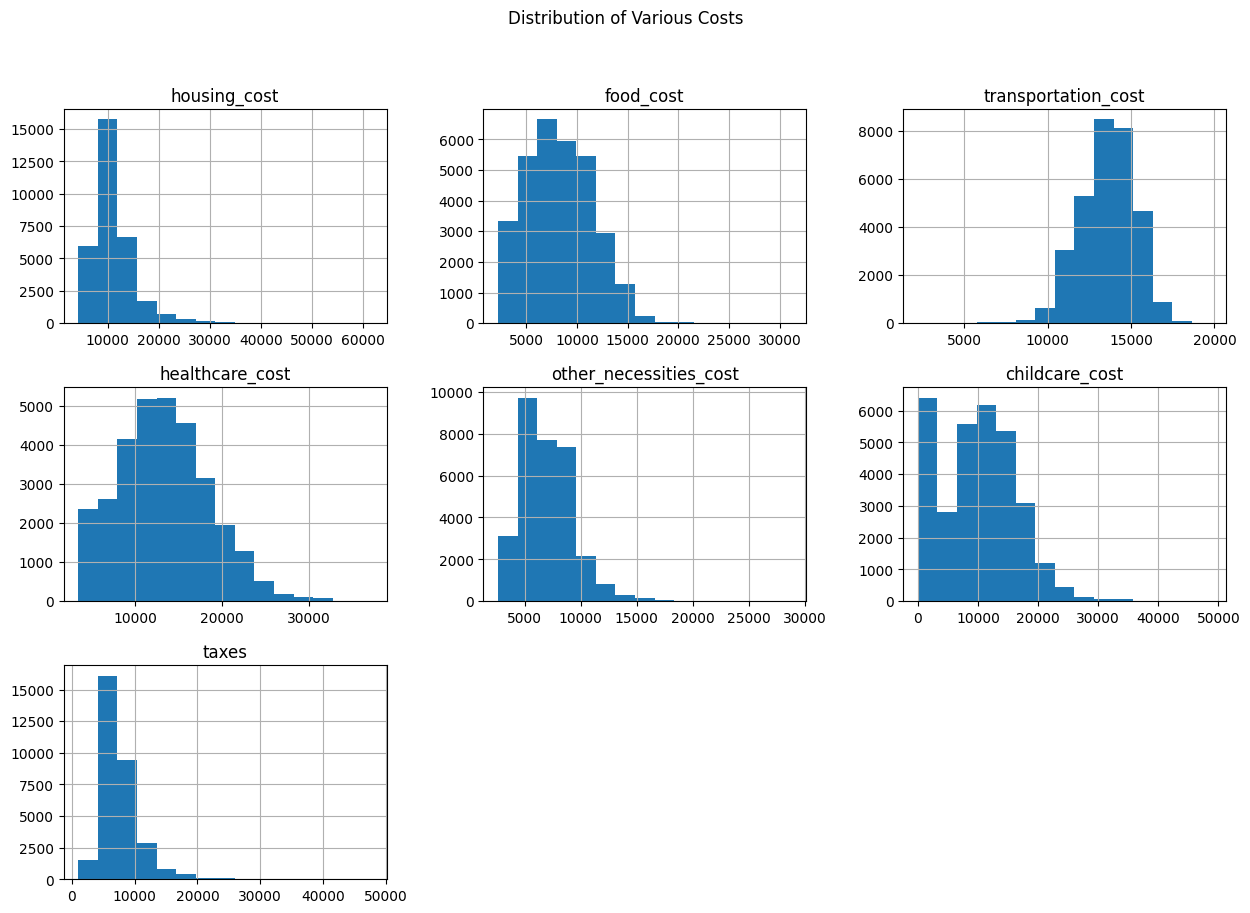

In [8]:
data[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Various Costs')
plt.show()

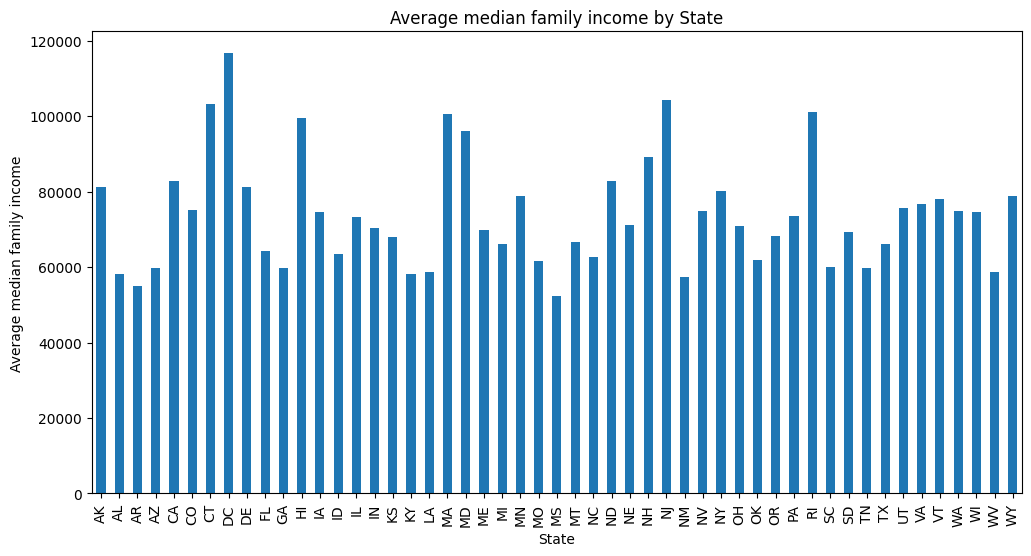

In [9]:
avg_cost_by_state = data.groupby('state')['median_family_income'].mean()
avg_cost_by_state.plot(kind='bar', figsize=(12, 6))
plt.title('Average median family income by State')
plt.ylabel('Average median family income')
plt.xlabel('State')
plt.show()

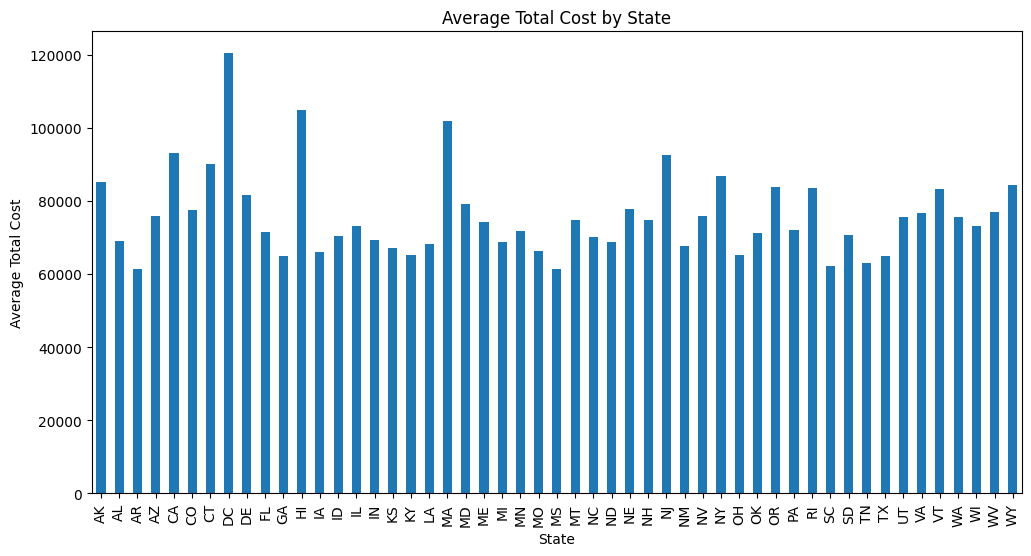

In [10]:
avg_cost_by_state = data.groupby('state')['total_cost'].mean()
avg_cost_by_state.plot(kind='bar', figsize=(12, 6))
plt.title('Average Total Cost by State')
plt.ylabel('Average Total Cost')
plt.xlabel('State')
plt.show()

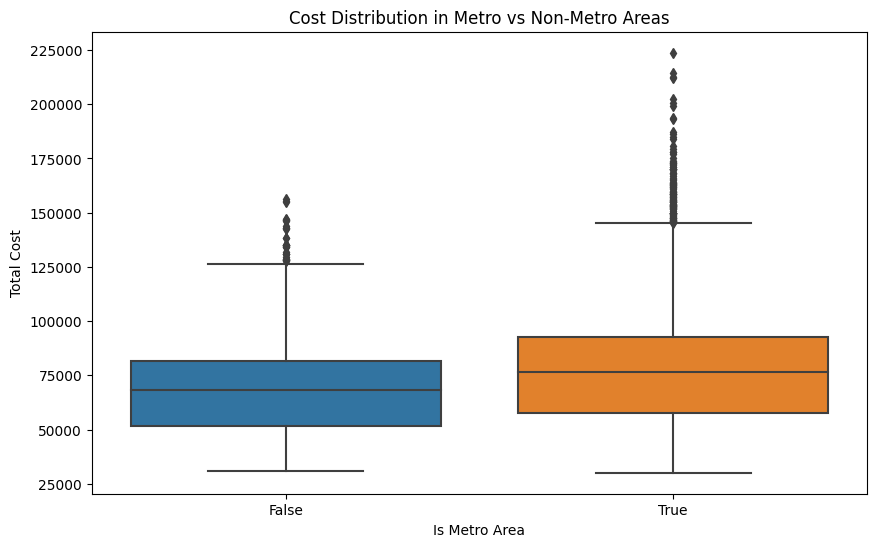

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isMetro', y='total_cost', data=data)
plt.title('Cost Distribution in Metro vs Non-Metro Areas')
plt.xlabel('Is Metro Area')
plt.ylabel('Total Cost')
plt.show()

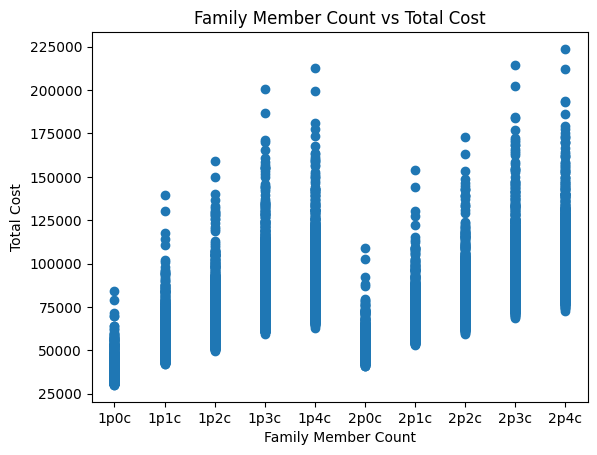

In [12]:
plt.scatter(data['family_member_count'], data['total_cost'])
plt.title('Family Member Count vs Total Cost')
plt.xlabel('Family Member Count')
plt.ylabel('Total Cost')
plt.show()

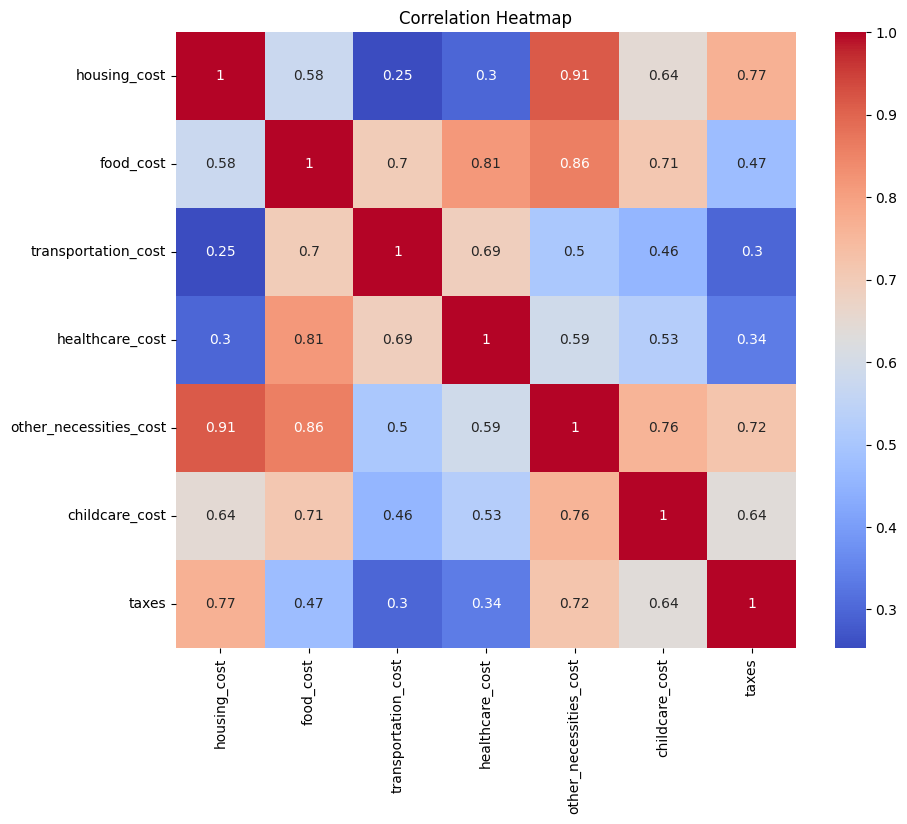

In [13]:
corr = data[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


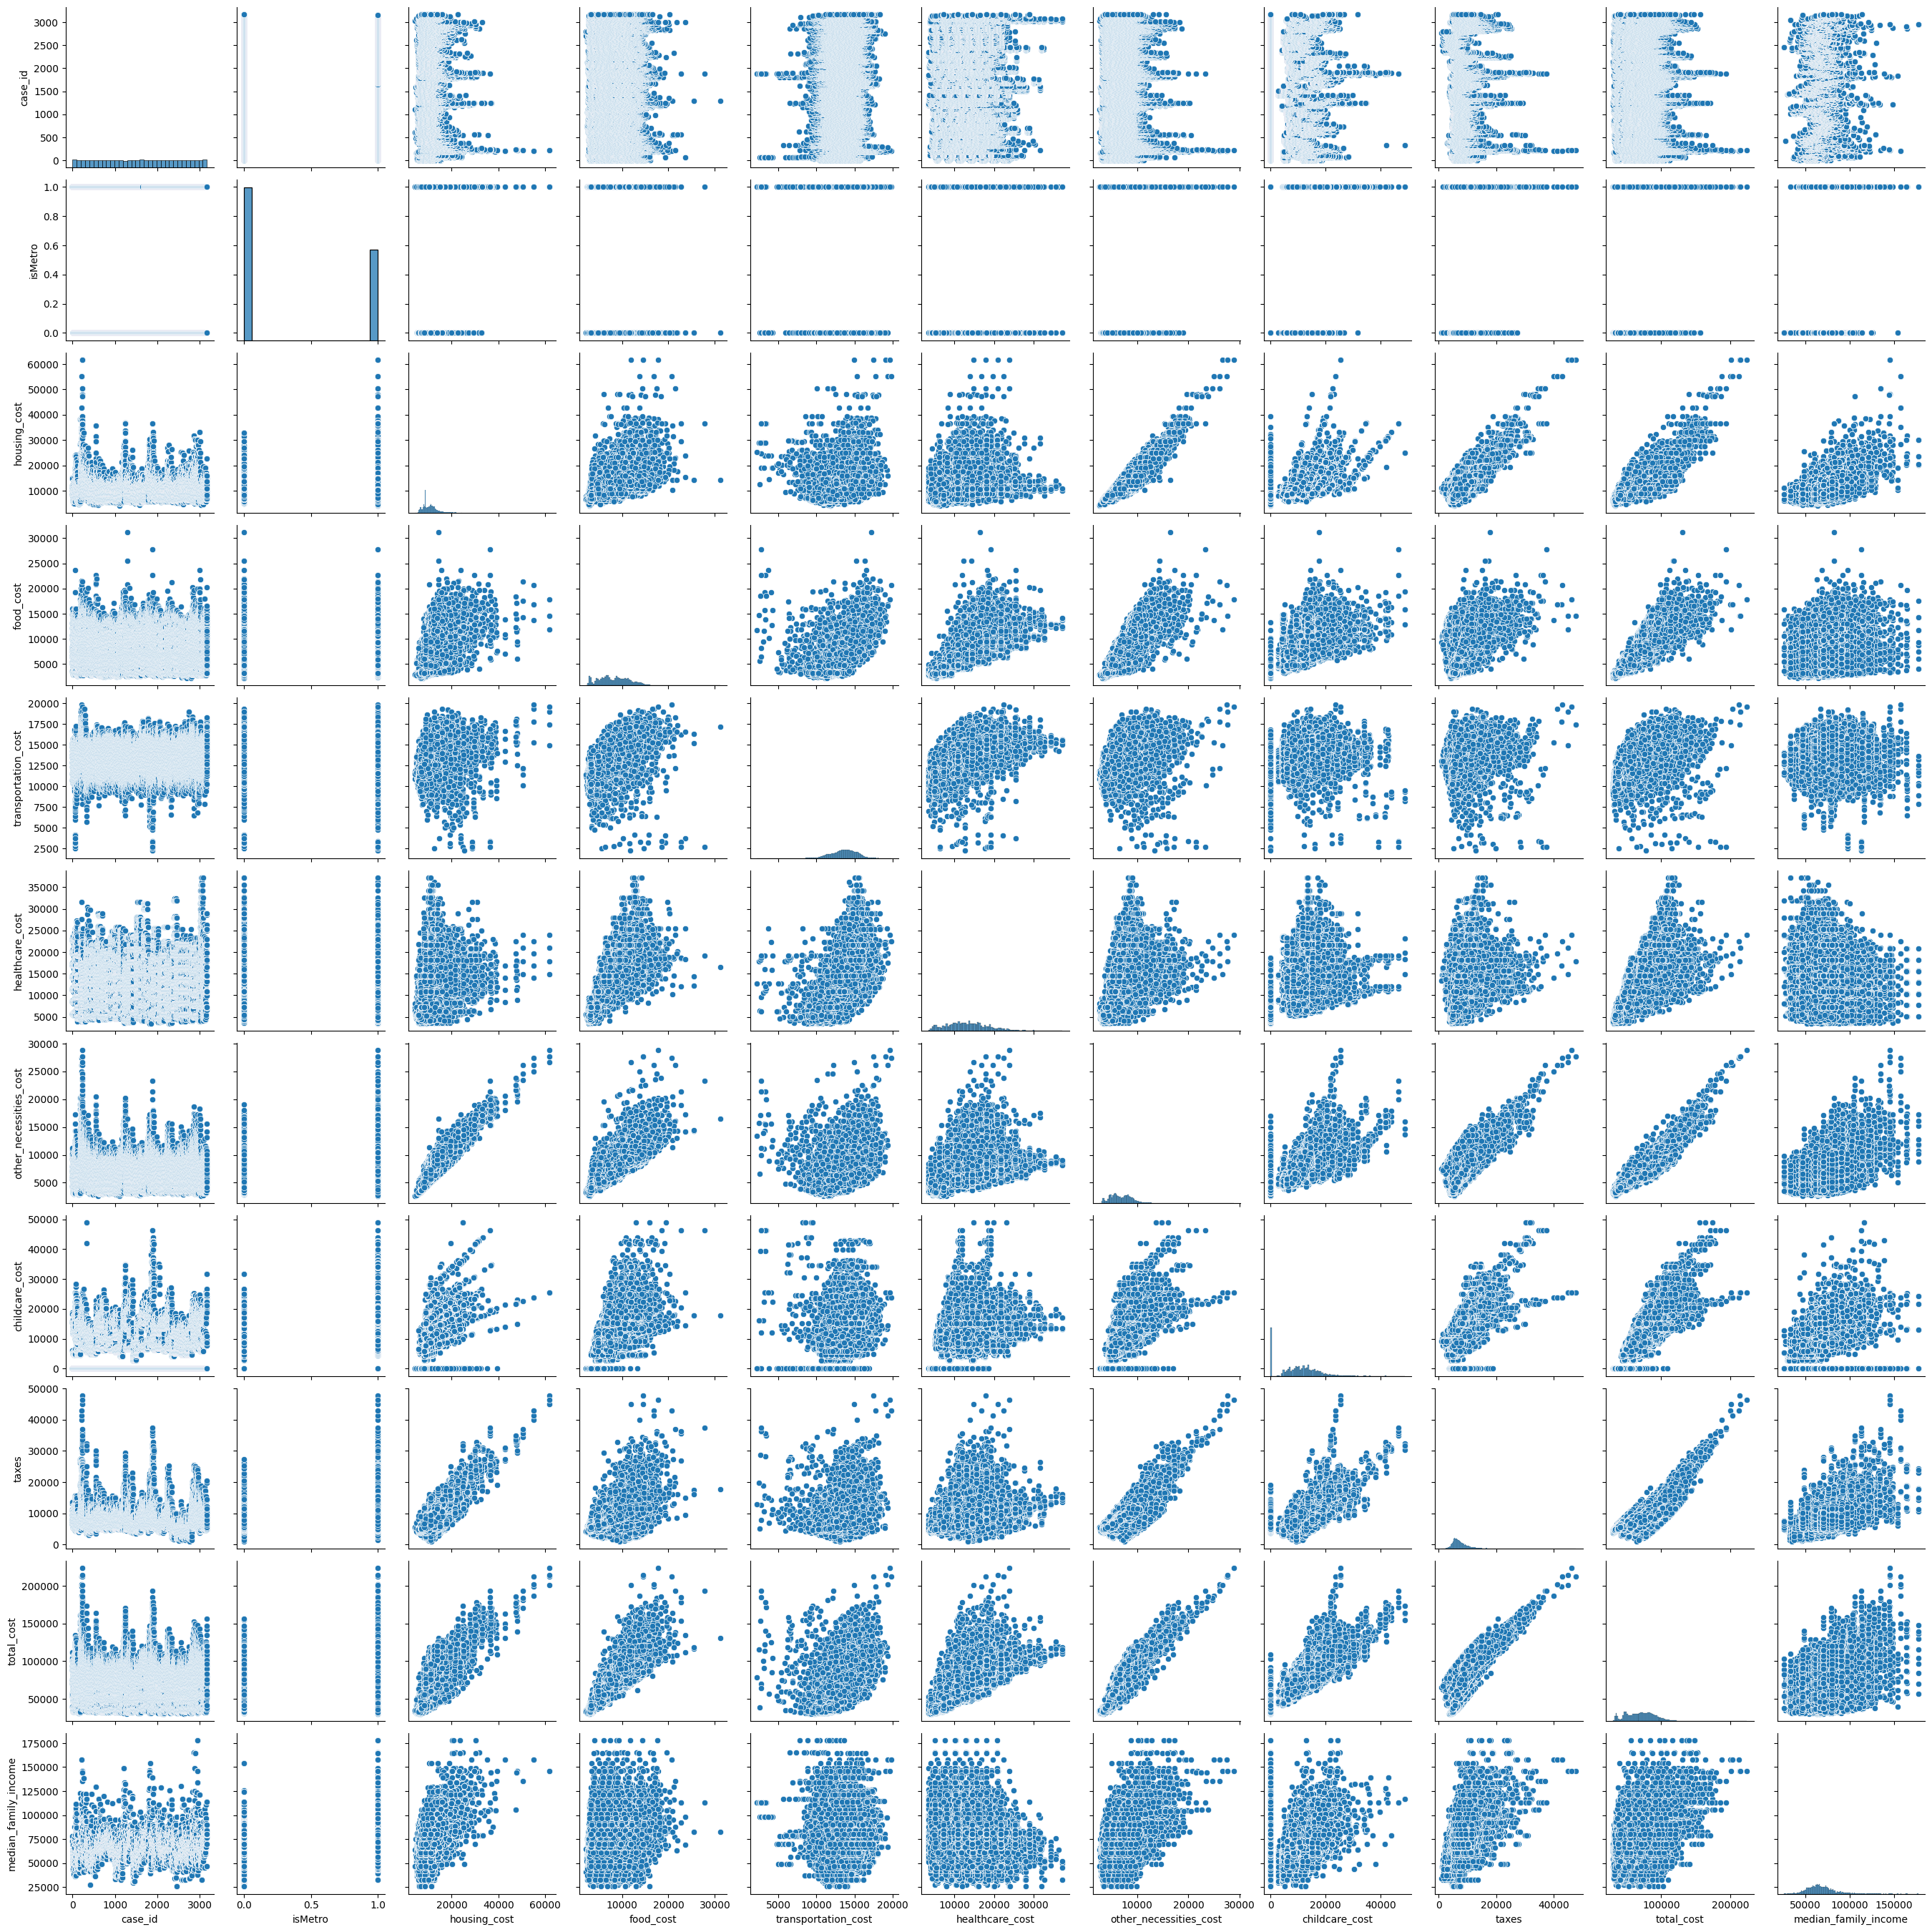

In [14]:
sns.pairplot(data)

# **Data pre-processing**

Handle Missing Values

In [15]:
imputer = SimpleImputer(strategy='median')
data['median_family_income'] = imputer.fit_transform(data[['median_family_income']])

Encoding Categorical Variables

In [16]:
label_encoder = LabelEncoder()
data['state'] = label_encoder.fit_transform(data['state'])
data['isMetro'] = label_encoder.fit_transform(data['isMetro'])
data['family_member_count'] = label_encoder.fit_transform(data['family_member_count'])

Identifying `esi_category` based diffrent factor

In [17]:
# Constants for regional and tax adjustments
COLA_METRO = 1.1
COLA_NON_METRO = 1.0
EMERGENCY_FUND_RATE = 0.15  # 15% of disposable income for savings/emergency fund

# Calculate various ratios and factors
data['disposable_income'] = data['median_family_income'] - data['total_cost']
data['DIR'] = data['disposable_income'] / data['median_family_income']
data['CBR'] = (data['housing_cost'] + data['food_cost'] + data['transportation_cost'] +
               data['healthcare_cost'] + data['other_necessities_cost'] + data['childcare_cost']) / data['median_family_income']

# Function to calculate dependency ratio
def dependency_ratio(row):
    family_members = row['family_member_count']
    return 1 + (family_members - 1) * 0.1  # 10% increase for each additional family member

# Function to calculate regional cost adjustment
def regional_cost_adjustment(row):
    return COLA_METRO if row['isMetro'] else COLA_NON_METRO

# Function to calculate tax burden adjustment
def tax_burden_adjustment(row):
    return 1 - (row['taxes'] / row['median_family_income'])

# Calculate Economic Stability Index (ESI)
def calculate_esi(row):
    DIR = row['DIR']
    CBR = row['CBR']
    DR = dependency_ratio(row)
    RCA = regional_cost_adjustment(row)
    SEFF = row['disposable_income'] * EMERGENCY_FUND_RATE
    TBA = tax_burden_adjustment(row)

    esi = (DIR * SEFF * TBA) / (CBR * DR * RCA)
    return esi

# Apply the ESI calculation
data['economic_stability_index'] = data.apply(calculate_esi, axis=1)

# Calculate mean and standard deviation of ESI
mean_esi = data['economic_stability_index'].mean()
std_dev_esi = data['economic_stability_index'].std()

def categorize_esi(esi):
    if esi < mean_esi - std_dev_esi:
        return 'very low'
    elif mean_esi - std_dev_esi <= esi < mean_esi:
        return 'low'
    elif mean_esi <= esi < mean_esi + std_dev_esi:
        return 'moderate'
    elif mean_esi + std_dev_esi <= esi < mean_esi + 2 * std_dev_esi:
        return 'high'
    else:
        return 'very high'

data['esi_category'] = data['economic_stability_index'].apply(categorize_esi)

Standard Scaling for Numerical Features

In [18]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

Feature Selection

In [19]:
X = data.drop(['case_id', 'areaname', 'county', 'disposable_income', 'DIR', 'CBR', 'economic_stability_index', 'esi_category'], axis=1)
y = data['esi_category']

# **Splitting the into training set and test set**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **Modelling**

In [21]:
def show_result_graph(actual, predicted):
  # Create a dataframe for easier plotting
  df_comparison = pd.DataFrame({'Actual': actual, 'Predicted': predicted})

  # Create a figure and a set of subplots
  fig, ax = plt.subplots(figsize=(12, 6))

  # Plot actual values
  df_comparison['Actual'].value_counts().sort_index().plot(kind='bar', ax=ax, position=0, width=0.4, label='Actual')

  # Plot predicted values
  df_comparison['Predicted'].value_counts().sort_index().plot(kind='bar', ax=ax, position=1, width=0.4, color='r', label='Predicted')

  # Adding titles and labels
  plt.title('Actual vs Predicted Values')
  plt.xlabel('Classes')
  plt.ylabel('Counts')
  plt.xticks(ticks=np.arange(len(df_comparison['Actual'].value_counts().sort_index())), labels=df_comparison['Actual'].value_counts().sort_index().index, rotation=0)
  plt.legend()
  plt.grid(True)
  plt.show()

def generate_report(actual, predicted):
  print(classification_report(actual, predicted))
  show_result_graph(actual, predicted)

Logistic Regression

Logistic Regression Accuracy: 0.8419445151438025
              precision    recall  f1-score   support

        high       0.86      0.97      0.91       249
         low       0.84      0.99      0.91      6053
    moderate       0.53      0.05      0.10      1240
   very high       1.00      0.99      1.00       316

    accuracy                           0.84      7858
   macro avg       0.81      0.75      0.73      7858
weighted avg       0.80      0.84      0.78      7858



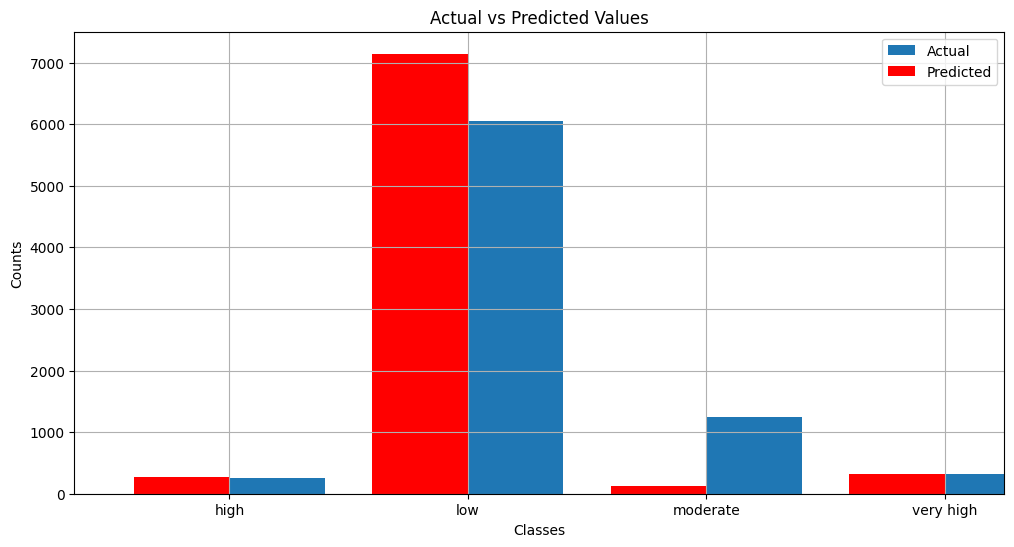

In [22]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", log_reg.score(X_test, y_test))
generate_report(y_test, y_pred_log_reg)

SGD Classifier

SGD Classifier Accuracy: 0.8259099007381013
              precision    recall  f1-score   support

        high       0.66      0.50      0.57       249
         low       0.83      1.00      0.90      6053
    moderate       0.31      0.01      0.02      1240
   very high       0.99      0.97      0.98       316

    accuracy                           0.83      7858
   macro avg       0.70      0.62      0.62      7858
weighted avg       0.75      0.83      0.76      7858



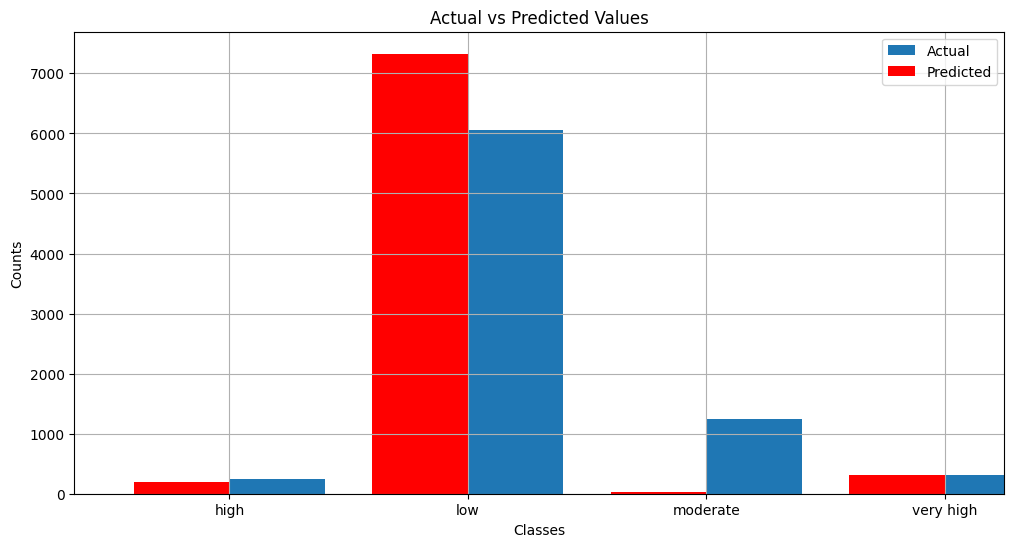

In [23]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_test)
print("SGD Classifier Accuracy:", sgd_clf.score(X_test, y_test))
generate_report(y_test, y_pred_sgd)

SVC

SVC Accuracy: 0.9802748791040977
              precision    recall  f1-score   support

        high       0.92      0.88      0.90       249
         low       0.99      1.00      0.99      6053
    moderate       0.97      0.92      0.94      1240
   very high       0.98      0.95      0.97       316

    accuracy                           0.98      7858
   macro avg       0.96      0.94      0.95      7858
weighted avg       0.98      0.98      0.98      7858



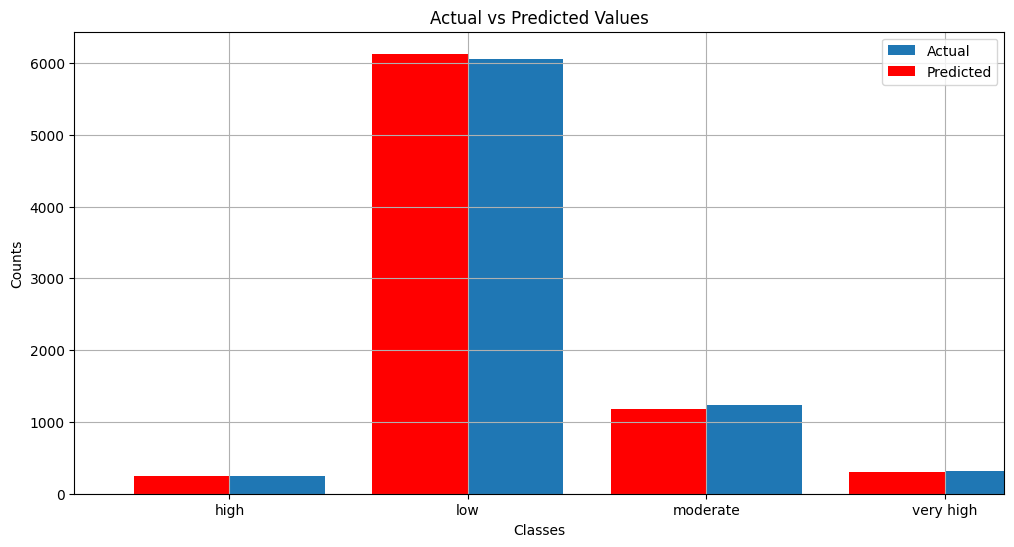

In [24]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", svc.score(X_test, y_test))
generate_report(y_test, y_pred_svc)

Decision Tree

Decision Tree Accuracy: 0.9536777806057521
              precision    recall  f1-score   support

        high       0.76      0.78      0.77       249
         low       0.98      0.98      0.98      6053
    moderate       0.87      0.87      0.87      1240
   very high       0.93      0.95      0.94       316

    accuracy                           0.95      7858
   macro avg       0.89      0.89      0.89      7858
weighted avg       0.95      0.95      0.95      7858



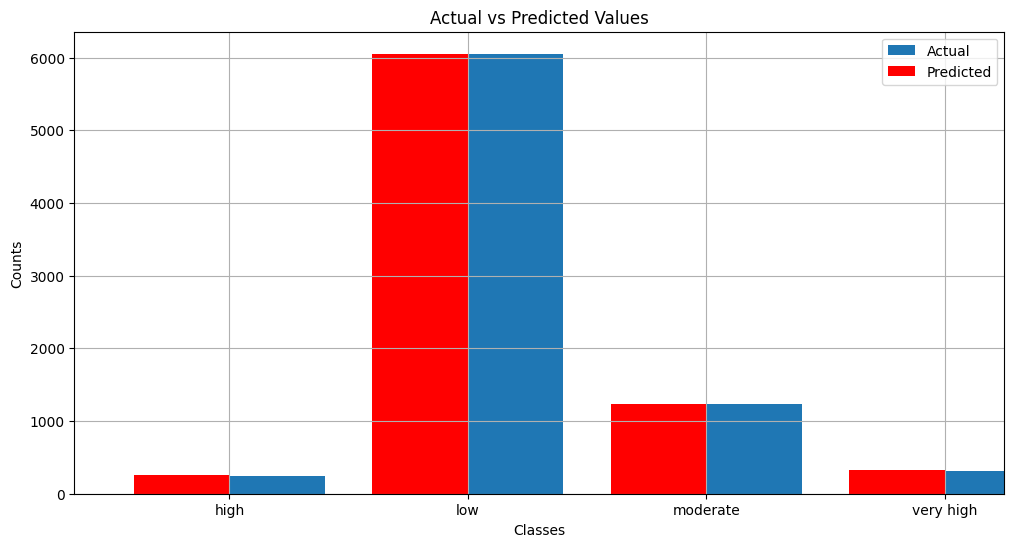

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", decision_tree.score(X_test, y_test))
generate_report(y_test, y_pred_decision_tree)

Random Forest

Random Forest Accuracy: 0.963222193942479
              precision    recall  f1-score   support

        high       0.86      0.73      0.79       249
         low       0.98      0.99      0.98      6053
    moderate       0.93      0.86      0.89      1240
   very high       0.91      0.95      0.93       316

    accuracy                           0.96      7858
   macro avg       0.92      0.89      0.90      7858
weighted avg       0.96      0.96      0.96      7858



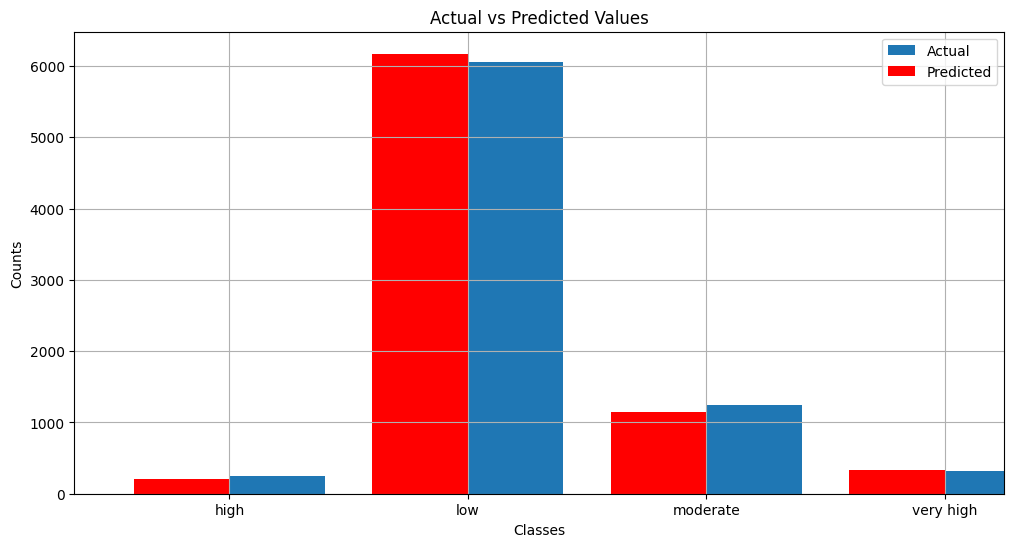

In [26]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
print("Random Forest Accuracy:", random_forest.score(X_test, y_test))
generate_report(y_test, y_pred_random_forest)

MLP Classifier

MLP Classifier Accuracy: 0.993000763553067
              precision    recall  f1-score   support

        high       0.97      0.92      0.94       249
         low       1.00      1.00      1.00      6053
    moderate       0.99      0.98      0.98      1240
   very high       0.98      0.99      0.98       316

    accuracy                           0.99      7858
   macro avg       0.98      0.97      0.98      7858
weighted avg       0.99      0.99      0.99      7858



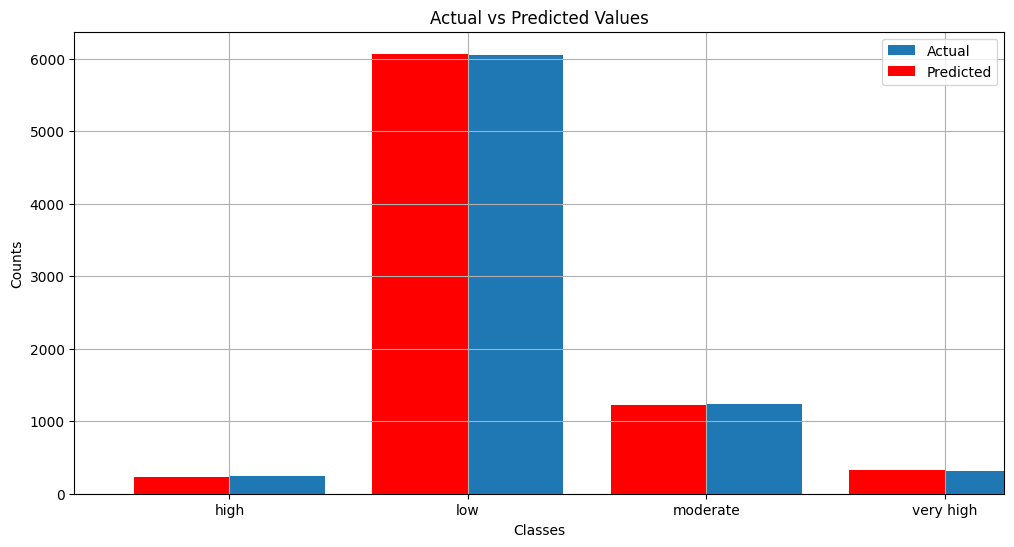

In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("MLP Classifier Accuracy:", mlp.score(X_test, y_test))
generate_report(y_test, y_pred_mlp)

Artificial Neural Networks

Epoch 1/100
737/737 [==============================] - 2s 2ms/step - loss: 0.5783 - accuracy: 0.7949
Epoch 2/100
737/737 [==============================] - 3s 4ms/step - loss: 0.2410 - accuracy: 0.9135
Epoch 3/100
737/737 [==============================] - 1s 2ms/step - loss: 0.1587 - accuracy: 0.9483
Epoch 4/100
737/737 [==============================] - 1s 2ms/step - loss: 0.1229 - accuracy: 0.9624
Epoch 5/100
737/737 [==============================] - 2s 3ms/step - loss: 0.1013 - accuracy: 0.9713
Epoch 6/100
737/737 [==============================] - 2s 3ms/step - loss: 0.0875 - accuracy: 0.9765
Epoch 7/100
737/737 [==============================] - 2s 2ms/step - loss: 0.0784 - accuracy: 0.9784
Epoch 8/100
737/737 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9803
Epoch 9/100
737/737 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9821
Epoch 10/100
737/737 [==============================] - 1s 2ms/step - loss: 0.0591 - accura

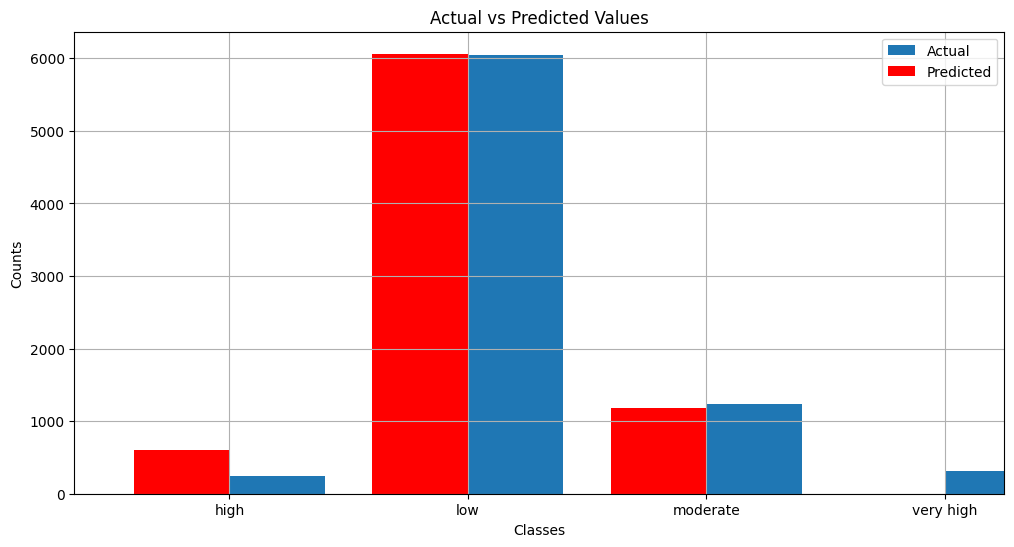

In [28]:
from keras.utils import to_categorical

# One-Hot Encoding of the Target Variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_train_encoded = to_categorical(y_train_encoded, num_classes=5)

y_test_encoded = encoder.transform(y_test)
y_test_encoded = to_categorical(y_test_encoded, num_classes=5)

ann = Sequential()
ann.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(units=16, activation='relu'))
ann.add(Dense(units=5, activation='sigmoid'))  # Change to 5 units for 5 categories
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train_encoded, batch_size=32, epochs=100)

# Predicting the Test set results
y_pred_ann = ann.predict(X_test)
y_pred_ann = np.argmax(y_pred_ann, axis=1)  # Convert predictions to class labels

# Evaluating the Model
loss, accuracy = ann.evaluate(X_test, y_test_encoded)
print("ANN Accuracy:", accuracy)

# Reverse Transform to Original Class Names
y_pred_ann = encoder.inverse_transform(y_pred_ann)
y_test_original = encoder.inverse_transform(np.argmax(y_test_encoded, axis=1))

generate_report(y_test_original, y_pred_ann)